In [1]:
from pathlib import Path

import pandas



results = pandas.read_csv(Path("__file__").parent.absolute().parent.joinpath("scripts").joinpath(
    "results").joinpath("faster_rcnn_inception_resnet_v2_atrous_lowproposals_oid_2018_01_28").joinpath("detection_frame.csv"))
results.head()

,filename,folder,full path,detection class,detection class name,detection box,detection score
0,1.nav-outlander-20my.png,cars,C:\projects\Object-Detection-Experiments\image...,1,car,[0.06209976 0.04740305 0.853039 0.93206036],0.921674
1,1.nav-outlander-20my.png,cars,C:\projects\Object-Detection-Experiments\image...,1,car,[0.48292777 0.3119185 0.82920647 0.45893016],0.639979
2,10.CAC80NIC141A021001.png,cars,C:\projects\Object-Detection-Experiments\image...,1,car,[0.1441085 0.02939004 0.8361079 0.95916015],0.938491
3,10.CAC80NIC141A021001.png,cars,C:\projects\Object-Detection-Experiments\image...,1,car,[0.48384625 0.50764 0.8194142 0.6666434 ],0.664856
4,10.CAC80NIC141A021001.png,cars,C:\projects\Object-Detection-Experiments\image...,1,car,[0.34256637 0.8834357 0.6997029 0.9739204 ],0.472751


In [2]:
results.describe()

,detection class,detection score
count,2468.000000,2468.000000
mean,2.934360,0.534847
std,1.665278,0.229719
min,0.000000,0.000000
25%,3.000000,0.387639
50%,3.000000,0.540015
75%,3.000000,0.694827
max,6.000000,0.984498


In [3]:
results = results[["filename", "folder", "detection class name", "detection score"]].fillna("no-class")
results.head()

,filename,folder,detection class name,detection score
0,1.nav-outlander-20my.png,cars,car,0.921674
1,1.nav-outlander-20my.png,cars,car,0.639979
2,10.CAC80NIC141A021001.png,cars,car,0.938491
3,10.CAC80NIC141A021001.png,cars,car,0.664856
4,10.CAC80NIC141A021001.png,cars,car,0.472751


In [4]:
classification = results.groupby(["filename", "folder", "detection class name"], as_index=False).agg({"detection score": "max"})
classification.head()

,filename,folder,detection class name,detection score
0,0_Parade_marchingband_1_11.jpg,faces,face,0.411049
1,0_Parade_marchingband_1_15.jpg,faces,face,0.576396
2,0_Parade_marchingband_1_16.jpg,faces,face,0.779685
3,0_Parade_marchingband_1_18.jpg,faces,face,0.791868
4,0_Parade_marchingband_1_21.jpg,faces,face,0.720754


In [5]:
import matplotlib.pyplot as pyplot

from inspect import signature
from sklearn.metrics import average_precision_score, precision_recall_curve
from ds_utils.metrics import plot_confusion_matrix


%matplotlib inline

def calc_metrics(df: pandas.DataFrame, label: str) -> None:
    print("=" * 20)
    print(f"label = {label}")
    print("=" * 20)
    df["detection label threshold 0.5"] = df.apply(lambda row: 
                                        1 if (row["detection score"] > 0.5) and (row["detection class name"] == label) else 0, 
                                                   axis=1)
    df["detection label threshold 0.65"] = df.apply(lambda row: 
                                        1 if (row["detection score"] > 0.65) and (row["detection class name"] == label) else 0, 
                                                    axis=1)
    print()
    print("Confusion Matrix Threshold = 0.5")
    print("=" * 20)
    figure = plot_confusion_matrix([1] * df.shape[0] , df["detection label threshold 0.5"], [0, 1])
    pyplot.show()
    print()
    print("Confusion Matrix Threshold = 0.65")
    print("=" * 20)
    figure = plot_confusion_matrix([1] * df.shape[0] , df["detection label threshold 0.65"], [0, 1])
    pyplot.show()

label = car

Confusion Matrix Threshold = 0.5


C:\Anaconda3\envs\object_detection\lib\site-packages\ds_utils\metrics.py:70: RuntimeWarning: invalid value encountered in longlong_scalars
  tnr = (tn / (tn + fp))


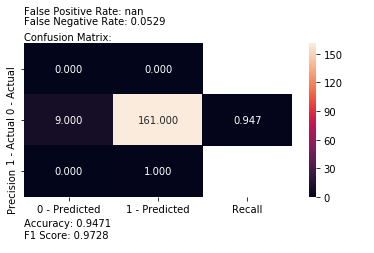


Confusion Matrix Threshold = 0.65


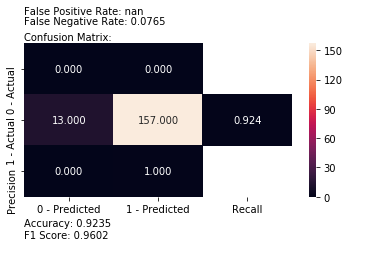

In [6]:
calc_metrics(classification[classification["folder"] == "cars"].copy(deep=True), "car")

label = drug

Confusion Matrix Threshold = 0.5


C:\Anaconda3\envs\object_detection\lib\site-packages\ds_utils\metrics.py:72: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv = (tp / (tp + fp))
C:\Anaconda3\envs\object_detection\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


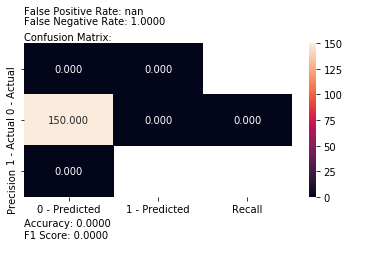


Confusion Matrix Threshold = 0.65


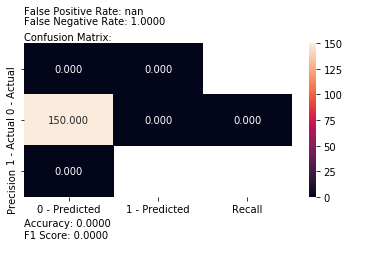

In [7]:
calc_metrics(classification[classification["folder"] == "drugs"].copy(deep=True), "drug")

label = face

Confusion Matrix Threshold = 0.5


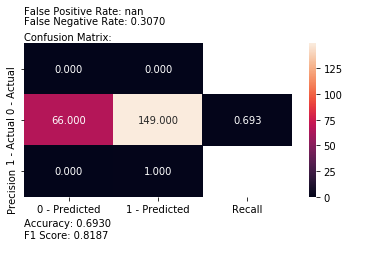


Confusion Matrix Threshold = 0.65


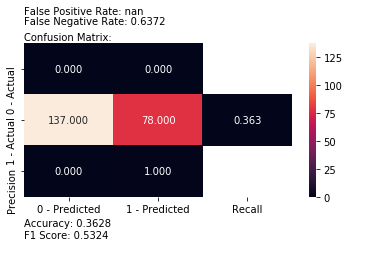

In [8]:
calc_metrics(classification[classification["folder"] == "faces"].copy(deep=True), "face")

label = nudity

Confusion Matrix Threshold = 0.5


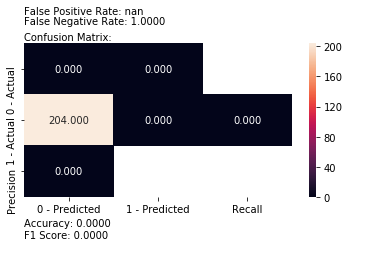


Confusion Matrix Threshold = 0.65


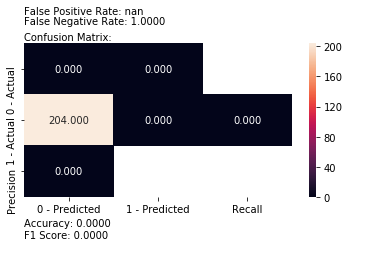

In [9]:
calc_metrics(classification[classification["folder"] == "nudity"].copy(deep=True), "nudity")

label = upskirt

Confusion Matrix Threshold = 0.5


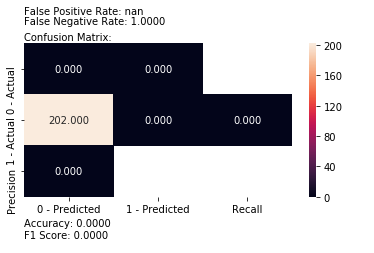


Confusion Matrix Threshold = 0.65


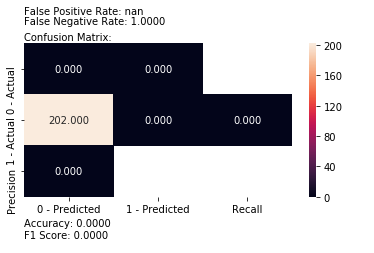

In [10]:
calc_metrics(classification[classification["folder"] == "upskirt"].copy(deep=True), "upskirt")

label = weapon

Confusion Matrix Threshold = 0.5


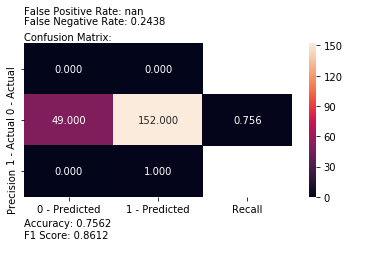


Confusion Matrix Threshold = 0.65


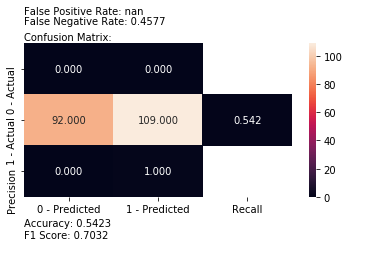

In [11]:
calc_metrics(classification[classification["folder"] == "weapons"].copy(deep=True), "weapon")